In [52]:
import numpy as np
import pandas as pd

In [53]:
gt = np.load('/Users/kramea/Documents/AIBEDO_dir/data_aibedo/CESM2_groundtruth.npy')
pr = np.load('/Users/kramea/Documents/AIBEDO_dir/data_aibedo/CESM2_predictions.npy')

In [97]:
import xarray as xr

In [139]:
preds = xr.open_dataset('/Users/kramea/Documents/AIBEDO_dir/data_aibedo/predictions_CESM2_val_3b6fg6sb_MLP_spherical_0constraints.nc')

In [155]:
preds.sel(lat=slice(-5,5))

KeyError: 'lat is not a valid dimension or coordinate'

In [55]:
import xarray as xr

In [105]:
ds = xr.open_dataset('/Users/kramea/Documents/AIBEDO_dir/data_aibedo/compress.isosph.CESM2.historical.r1i1p1f1.Input.Exp8_fixed.nc')

In [57]:
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
lon_list = ds.lon.data
lat_list = ds.lat.data

In [59]:
import random

In [73]:
from sklearn.metrics import mean_squared_error

In [135]:
rms_values_tas = []
for i in range(len(preds.tas_preds)):
    rms_values_tas.append(mean_squared_error(preds.tas_targets.data[i], preds.tas_preds.data[i]))
    

In [141]:
rms_values_ps = []
for i in range(len(preds.ps_preds)):
    rms_values_ps.append(mean_squared_error(preds.ps_targets.data[i], preds.ps_preds.data[i]))
    

In [143]:
rms_values_pr = []
for i in range(len(preds.pr_preds)):
    rms_values_pr.append(mean_squared_error(preds.pr_targets.data[i], preds.pr_preds.data[i]))
  

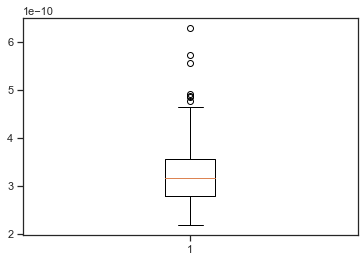

In [144]:
plt.boxplot(rms_values_pr)
#fig.suptitle('Region-wise MSE for Sea Level Pressure Prediction')
plt.show()

In [132]:
rms

1.655774

In [75]:
error_list = []
for i in range(len(gt)):
    error_list.append(mse(gt[i, :, 0], pr[i, :, 0]))

error_list = [i for i in error_list if i > 0.1]

error_list = [i for i in error_list if i < 100]

lsmask_round = [round(x) for x in ds.lsMask.data[0]] 
lsmask_round = [0 if x < 0 else round(x) for x in lsmask_round ]
lsmask_round = [1 if x > 1 else round(x) for x in lsmask_round ]

zipped = list(zip(lon_list, lat_list, error_list, lsmask_round))

df1 = pd.DataFrame(zipped, columns=['Lon', 'Lat', 'error', 'lsmask'])

tropic = df1[(df1.Lat<30) & (df1.Lat>-30)]

temperate = df1[((df1.Lat>30) & (df1.Lat<60)) | ((df1.Lat <-30 ) & (df1.Lat > -60)) ]

arctic = df1[(df1.Lat>60)]

antarctic = df1[(df1.Lat < -60)]

land = df1[(df1.lsmask ==1)]

sea = df1[(df1.lsmask == 0)]

df1['cat'] = 'tas'

In [76]:
df1

,Lon,Lat,error,lsmask,cat
0,-90.000000,58.282526,0.590634,0,tas
1,-90.000000,-58.282526,0.675992,0,tas
2,90.000000,58.282526,0.630801,1,tas
3,90.000000,-58.282526,0.611102,0,tas
4,121.717474,0.000000,0.637710,1,tas
5,-121.717474,0.000000,0.629144,0,tas
6,0.000000,-31.717474,0.599589,0,tas
7,0.000000,31.717474,0.537533,1,tas
8,180.000000,-31.717474,0.630787,0,tas
9,180.000000,31.717474,0.561296,0,tas


In [77]:
error_list = []
for i in range(len(gt)):
    error_list.append(mse(gt[i, :, 1], pr[i, :, 1]))

error_list = [i for i in error_list if i > 0.1]

error_list = [i for i in error_list if i < 100]

lsmask_round = [round(x) for x in ds.lsMask.data[0]] 
lsmask_round = [0 if x < 0 else round(x) for x in lsmask_round ]
lsmask_round = [1 if x > 1 else round(x) for x in lsmask_round ]

zipped = list(zip(lon_list, lat_list, error_list, lsmask_round))

df2 = pd.DataFrame(zipped, columns=['Lon', 'Lat', 'error', 'lsmask'])

df2['cat'] = 'psl'

tropic = df2[(df2.Lat<30) & (df2.Lat>-30)]

temperate = df2[((df2.Lat>30) & (df2.Lat<60)) | ((df2.Lat <-30 ) & (df2.Lat > -60)) ]

arctic = df2[(df2.Lat>60)]

antarctic = df2[(df2.Lat < -60)]

land = df2[(df2.lsmask ==1)]

sea = df2[(df2.lsmask == 0)]

df2['cat'] = 'psl'

In [78]:
df2

,Lon,Lat,error,lsmask,cat
0,-90.000000,58.282526,0.552688,0,psl
1,-90.000000,-58.282526,0.622533,0,psl
2,90.000000,58.282526,0.702783,1,psl
3,90.000000,-58.282526,0.615917,0,psl
4,121.717474,0.000000,0.613463,1,psl
5,-121.717474,0.000000,0.583876,0,psl
6,0.000000,-31.717474,0.759992,0,psl
7,0.000000,31.717474,0.510121,1,psl
8,180.000000,-31.717474,0.503001,0,psl
9,180.000000,31.717474,0.494552,0,psl


In [79]:
error_list = []
for i in range(len(gt)):
    error_list.append(mse(gt[i, :, 2], pr[i, :, 2]))

error_list = [i for i in error_list if i > 0.1]

error_list = [i for i in error_list if i < 100]

lsmask_round = [round(x) for x in ds.lsMask.data[0]] 
lsmask_round = [0 if x < 0 else round(x) for x in lsmask_round ]
lsmask_round = [1 if x > 1 else round(x) for x in lsmask_round ]

zipped = list(zip(lon_list, lat_list, error_list, lsmask_round))

df3 = pd.DataFrame(zipped, columns=['Lon', 'Lat', 'error', 'lsmask'])

tropic = df3[(df3.Lat<30) & (df3.Lat>-30)]

temperate = df3[((df3.Lat>30) & (df3.Lat<60)) | ((df3.Lat <-30 ) & (df3.Lat > -60)) ]

arctic = df3[(df3.Lat>60)]

antarctic = df3[(df3.Lat < -60)]

land = df3[(df3.lsmask ==1)]

sea = df3[(df3.lsmask == 0)]

df3['cat'] = 'pre'

In [80]:
df3

,Lon,Lat,error,lsmask,cat
0,-90.000000,58.282526,0.606421,0,pre
1,-90.000000,-58.282526,0.673857,0,pre
2,90.000000,58.282526,0.676950,1,pre
3,90.000000,-58.282526,0.699912,0,pre
4,121.717474,0.000000,0.668542,1,pre
5,-121.717474,0.000000,0.665306,0,pre
6,0.000000,-31.717474,0.637841,0,pre
7,0.000000,31.717474,0.630899,1,pre
8,180.000000,-31.717474,0.635479,0,pre
9,180.000000,31.717474,0.626623,0,pre


In [81]:
df = pd.concat([df1, df2, df3])

In [82]:
df

,Lon,Lat,error,lsmask,cat
0,-90.000000,58.282526,0.590634,0,tas
1,-90.000000,-58.282526,0.675992,0,tas
2,90.000000,58.282526,0.630801,1,tas
3,90.000000,-58.282526,0.611102,0,tas
4,121.717474,0.000000,0.637710,1,tas
5,-121.717474,0.000000,0.629144,0,tas
6,0.000000,-31.717474,0.599589,0,tas
7,0.000000,31.717474,0.537533,1,tas
8,180.000000,-31.717474,0.630787,0,tas
9,180.000000,31.717474,0.561296,0,tas


In [83]:

tropic = df[(df.Lat<30) & (df.Lat>-30)]

temperate = df[((df.Lat>30) & (df.Lat<60)) | ((df.Lat <-30 ) & (df.Lat > -60)) ]

arctic = df[(df.Lat>60)]

antarctic = df[(df.Lat < -60)]

land = df[(df.lsmask ==1)]

sea = df[(df.lsmask == 0)]

In [84]:
tropic['region'] = 'Tropics'
temperate['region'] = 'Midlatitude'
arctic['region'] = 'Arctic'
antarctic['region'] = 'Antarctic'
land['region'] = 'Land'
sea['region'] = 'Ocean'

/var/folders/2k/h47n3n1n0p7b4yhssc9tmbyr__0hym/T/ipykernel_68058/4035745918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tropic['region'] = 'Tropics'
/var/folders/2k/h47n3n1n0p7b4yhssc9tmbyr__0hym/T/ipykernel_68058/4035745918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperate['region'] = 'Midlatitude'
/var/folders/2k/h47n3n1n0p7b4yhssc9tmbyr__0hym/T/ipykernel_68058/4035745918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [85]:
region_df = df = pd.concat([tropic, temperate, arctic, antarctic, land, sea])

In [86]:
region_df_tas = df[(df.cat == 'tas')]

In [87]:
region_df_psl = df[(df.cat == 'psl')]


In [88]:
region_df_pre = df[(df.cat == 'pre')]

In [89]:
region_df_pre

,Lon,Lat,error,lsmask,cat,region
4,121.717474,0.000000,0.668542,1,pre,Tropics
5,-121.717474,0.000000,0.665306,0,pre,Tropics
10,58.282526,0.000000,0.724574,0,pre,Tropics
11,-58.282526,0.000000,0.662287,1,pre,Tropics
0,-90.000000,58.282526,0.606421,0,pre,Midlatitude
1,-90.000000,-58.282526,0.673857,0,pre,Midlatitude
2,90.000000,58.282526,0.676950,1,pre,Midlatitude
3,90.000000,-58.282526,0.699912,0,pre,Midlatitude
6,0.000000,-31.717474,0.637841,0,pre,Midlatitude
7,0.000000,31.717474,0.630899,1,pre,Midlatitude


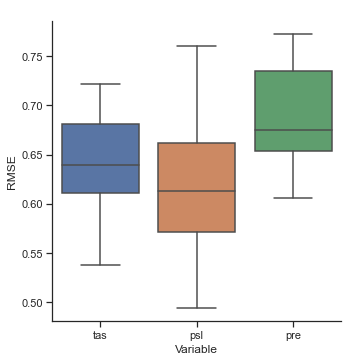

In [96]:
import seaborn as sns
sns.set_theme(style="white")
sns.set_style("ticks")


sns.catplot(
    kind = "box",
    x = "cat",
    y = "error",
    data = df
).set(title=" ", ylabel="RMSE", xlabel="Variable")

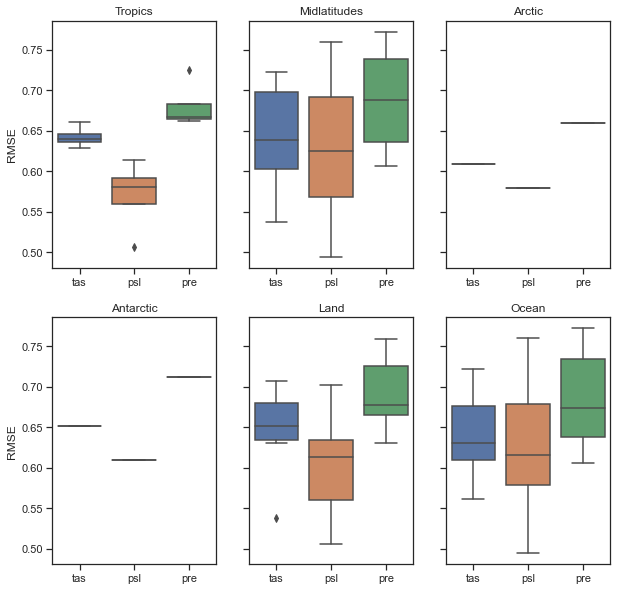

In [95]:
fig, axes = plt.subplots(figsize =(10, 10), nrows=2, ncols=3, sharey=True) # create 2x3 array of subplots
sns.boxplot(data=tropic,x = "cat", y = "error", ax=axes[0,0]).set(title="Tropics", ylabel="RMSE", xlabel="")
sns.boxplot(data=temperate,x = "cat", y = "error", ax=axes[0,1]).set(title="Midlatitudes", ylabel="", xlabel="")
sns.boxplot(data=arctic, x = "cat",y = "error", ax=axes[0,2]).set(title="Arctic", ylabel="", xlabel="")
sns.boxplot(data=antarctic,x = "cat", y = "error", ax=axes[1,0]).set(title="Antarctic", ylabel="RMSE", xlabel="")
sns.boxplot(data=land,x = "cat",y = "error", ax=axes[1,1]).set(title="Land", ylabel="", xlabel="")
sns.boxplot(data=sea,x = "cat",y = "error", ax=axes[1,2]).set(title="Ocean", ylabel="", xlabel="")
#fig.suptitle('Region-wise MSE for Sea Level Pressure Prediction')
plt.show()

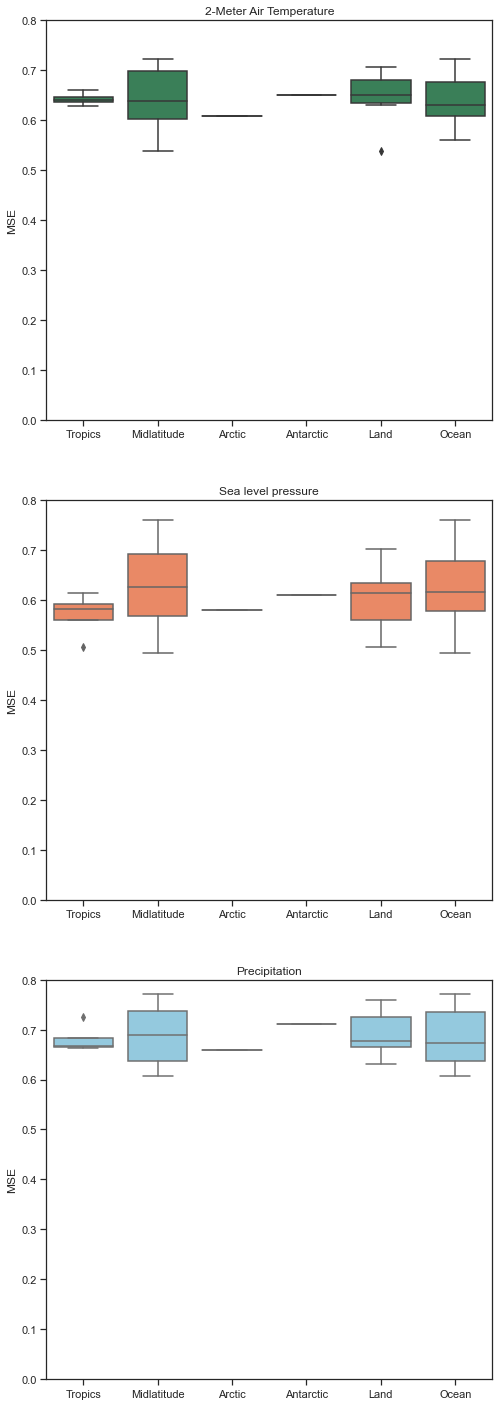

In [92]:
fig, axes = plt.subplots(figsize =(8, 25), nrows=3, ncols=1, sharex=False) # create 2x2 array of subplots
sns.boxplot(data=region_df_tas,x = "region", y = "error", color='seagreen', ax=axes[0]).set(title="2-Meter Air Temperature", 
                                                                                            ylabel="MSE", xlabel="", ylim=(0, 0.8))
sns.boxplot(data=region_df_psl,x = "region", y = "error", color='coral', ax=axes[1]).set(title="Sea level pressure", 
                                                                                         ylabel="MSE", xlabel="", ylim=(0, 0.8))
sns.boxplot(data=region_df_pre, x = "region",y = "error", color='skyblue', ax=axes[2]).set(title="Precipitation", 
                                                                                           ylabel="MSE", xlabel="", ylim=(0, 0.8))
#fig.suptitle('Region-wise MSE for Sea Level Pressure Prediction')
plt.show()

In [93]:
temperate

,Lon,Lat,error,lsmask,cat,region
0,-90.000000,58.282526,0.590634,0,tas,Midlatitude
1,-90.000000,-58.282526,0.675992,0,tas,Midlatitude
2,90.000000,58.282526,0.630801,1,tas,Midlatitude
3,90.000000,-58.282526,0.611102,0,tas,Midlatitude
6,0.000000,-31.717474,0.599589,0,tas,Midlatitude
7,0.000000,31.717474,0.537533,1,tas,Midlatitude
8,180.000000,-31.717474,0.630787,0,tas,Midlatitude
9,180.000000,31.717474,0.561296,0,tas,Midlatitude
14,110.905157,30.000000,0.707314,1,tas,Midlatitude
15,110.905157,-30.000000,0.645948,0,tas,Midlatitude


In [94]:
tropic

,Lon,Lat,error,lsmask,cat,region
4,121.717474,0.0,0.637710,1,tas,Tropics
5,-121.717474,0.0,0.629144,0,tas,Tropics
10,58.282526,0.0,0.641368,0,tas,Tropics
11,-58.282526,0.0,0.661269,1,tas,Tropics
4,121.717474,0.0,0.613463,1,psl,Tropics
5,-121.717474,0.0,0.583876,0,psl,Tropics
10,58.282526,0.0,0.578188,0,psl,Tropics
11,-58.282526,0.0,0.505753,1,psl,Tropics
4,121.717474,0.0,0.668542,1,pre,Tropics
5,-121.717474,0.0,0.665306,0,pre,Tropics
